In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [17]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)


X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32)

In [18]:
# Define your neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


# Initialize the model
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1

model = NeuralNet(input_size, hidden_size, hidden_size, output_size)

In [19]:
model

NeuralNet(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [20]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/1000, Loss: 0.5996155142784119
Epoch 2/1000, Loss: 0.5955098271369934
Epoch 3/1000, Loss: 0.5914361476898193
Epoch 4/1000, Loss: 0.5873947143554688
Epoch 5/1000, Loss: 0.5833868980407715
Epoch 6/1000, Loss: 0.5794106721878052
Epoch 7/1000, Loss: 0.5754663348197937
Epoch 8/1000, Loss: 0.5715545415878296
Epoch 9/1000, Loss: 0.5676722526550293
Epoch 10/1000, Loss: 0.5638207793235779
Epoch 11/1000, Loss: 0.560001015663147
Epoch 12/1000, Loss: 0.5562140345573425
Epoch 13/1000, Loss: 0.5524565577507019
Epoch 14/1000, Loss: 0.5487282276153564
Epoch 15/1000, Loss: 0.5450276136398315
Epoch 16/1000, Loss: 0.54135662317276
Epoch 17/1000, Loss: 0.5377137660980225
Epoch 18/1000, Loss: 0.5340988636016846
Epoch 19/1000, Loss: 0.530510663986206
Epoch 20/1000, Loss: 0.5269468426704407
Epoch 21/1000, Loss: 0.5234097838401794
Epoch 22/1000, Loss: 0.5198987126350403
Epoch 23/1000, Loss: 0.5164134502410889
Epoch 24/1000, Loss: 0.5129537582397461
Epoch 25/1000, Loss: 0.5095199942588806
Epoch 26/1000

### Model Performance Metrics for the Training set

In [21]:
with torch.no_grad():
    y_train_pred = model(X_train_tensor)

y_train_pred = scaler_Y.inverse_transform(y_train_pred)   

In [22]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r_squared_train= r2_score(y_train, y_train_pred)
r_value_train = np.sqrt(r_squared_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print(f"RMSE: {rmse_train:.4f}")
print(f"R-squared (R²): {r_squared_train:.4f}")
print(f"R-value (R): {r_value_train:.4f}")
print(f"MAPE: {mape_train:.4f}")

RMSE: 1.1414
R-squared (R²): 0.0716
R-value (R): 0.2675
MAPE: 0.0101


### Model Performance Metrics for the Test set

In [23]:
# Make predictions on the test data
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
y_test_pred = scaler_Y.inverse_transform(y_test_pred)

In [24]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared_test= r2_score(y_test, y_test_pred)
r_value_test = np.sqrt(r_squared_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"RMSE: {rmse_test:.4f}")
print(f"R-squared (R²): {r_squared_test:.4f}")
print(f"R-value (R): {r_value_test:.4f}")
print(f"MAPE: {mape_test:.4f}")

RMSE: 0.9621
R-squared (R²): 0.0021
R-value (R): 0.0456
MAPE: 0.0089


## A comparison plot for the predicted and actual values for the Training set

In [25]:
compare_train_df = pd.DataFrame(y_train_pred, columns=['predicted'])
compare_train_df['actual'] = y_train.values

In [26]:
compare_train_df.head(10)

,predicted,actual
0,89.946820,87.961187
1,90.024219,88.565905
2,90.219596,90.986610
3,90.149219,91.640657
4,90.150735,91.081881
5,90.013702,89.832310
6,90.382228,91.594430
7,90.153352,90.492627
8,90.376147,91.337506
9,89.999671,90.651737


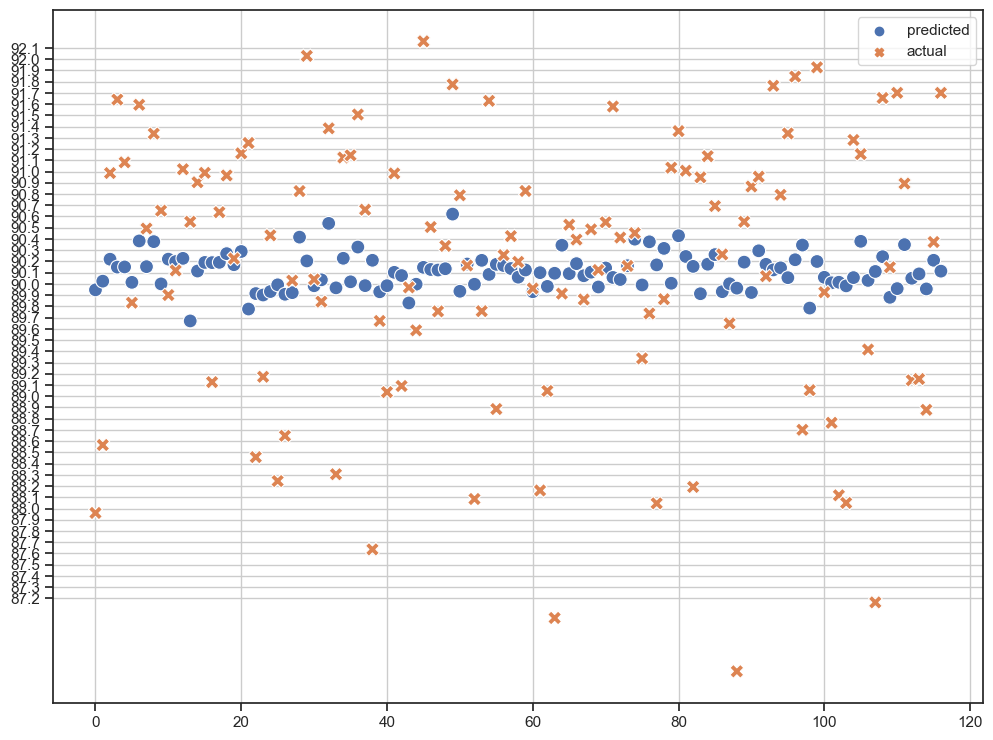

In [27]:
plt.figure(figsize=(12,9))

sns.set(style="ticks")
sns.scatterplot(data=compare_train_df, s=100)


y_ticks = np.arange(87.2, 92.2, 0.1) 
plt.yticks(y_ticks)
plt.grid(True)

## A comparison plot for the predicted and actual values for the Test set

In [28]:
compare_test_df = pd.DataFrame(y_test_pred, columns=['predicted'])
compare_test_df['actual'] = y_test.values

In [29]:
compare_test_df.head(10)

,predicted,actual
0,90.033776,89.959033
1,90.198232,90.590392
2,89.903576,88.761667
3,90.251175,90.777612
4,90.056857,90.116769
5,90.364044,90.428091
6,90.351379,91.709526
7,89.820234,89.376526
8,90.156754,90.828132
9,90.147876,90.003263


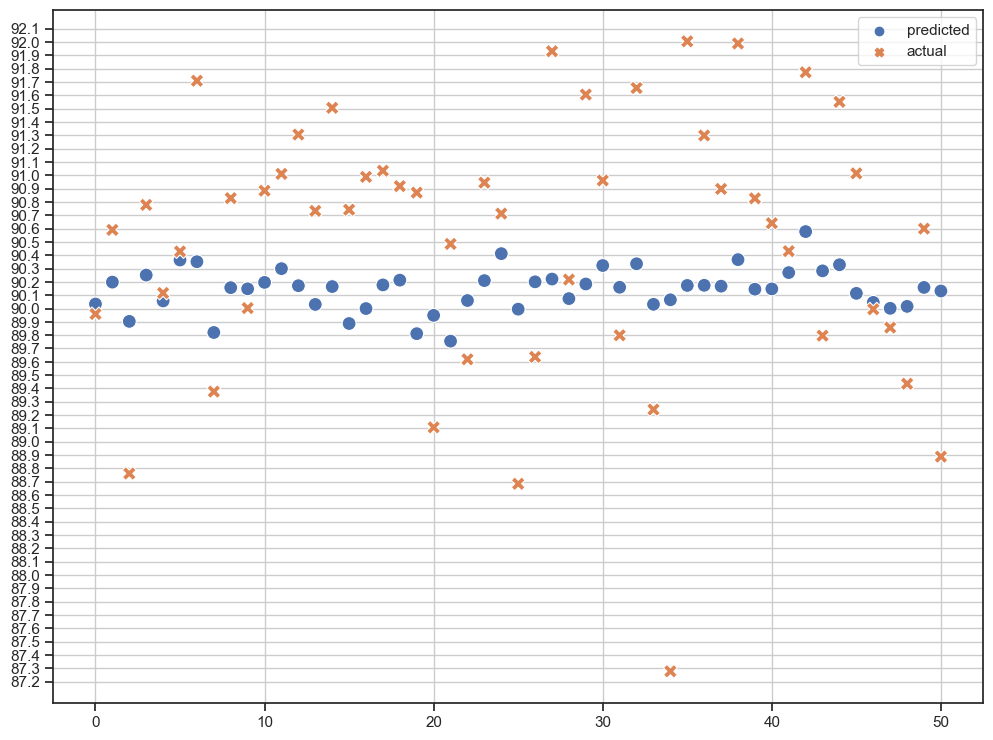

In [30]:
plt.figure(figsize=(12,9))

sns.set(style="ticks")
sns.scatterplot(data=compare_test_df, s=100)


y_ticks = np.arange(87.2, 92.2, 0.1) 
plt.yticks(y_ticks)
plt.grid(True)